In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [75]:
vacc=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")
vacc.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [76]:
vacc.shape

(26707, 34)

In [77]:
vacc["h1n1_vaccine"].sum()

5674

In [78]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [79]:
vacc.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

<Axes: ylabel='h1n1_vaccine'>

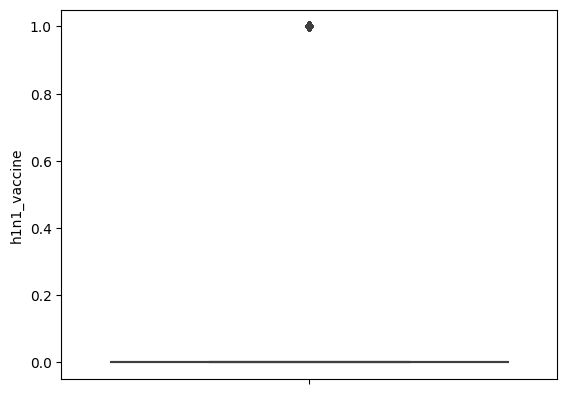

In [80]:
sns.boxplot(y="h1n1_vaccine",data=vacc)

In [81]:
outliers=[]
def detect_outliers(data):
  threshold=3
  mean=np.mean(data)
  std=np.std(data)

  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers    

In [82]:
outliers_pt=detect_outliers(vacc["h1n1_vaccine"])
outliers_pt 
### no outliers are there

[]

In [83]:
vacc.describe(include="all")

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26707,26707,22284,25299,24665,25244,26707,26458.000000,26458.000000,26707.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4,2,3,2,2,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21222,15858,12777,13555,18736,13560,11645,NaN,NaN,NaN
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000


<Axes: xlabel='marital_status', ylabel='count'>

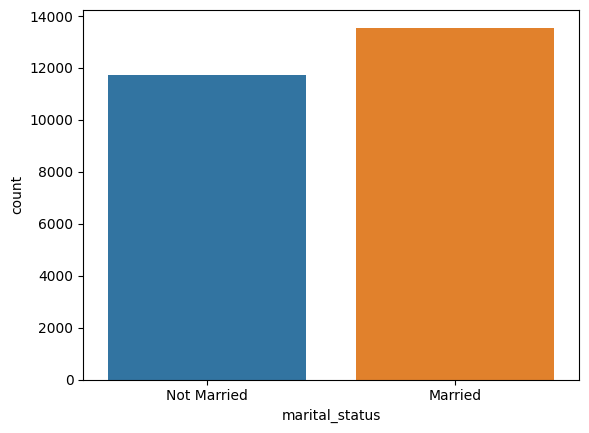

In [84]:
sns.countplot(x="marital_status",data=vacc)

<Axes: xlabel='race', ylabel='count'>

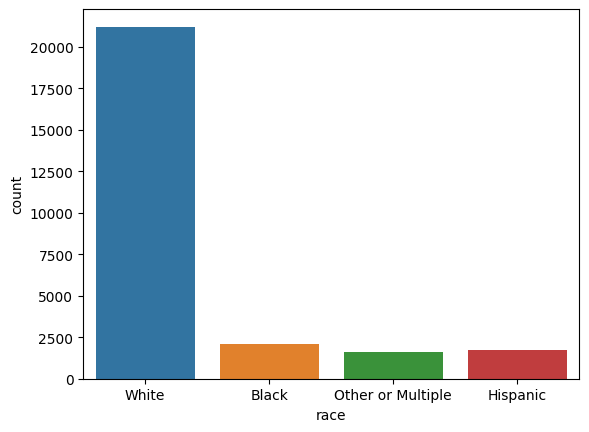

In [85]:
sns.countplot(x="race",data=vacc)

<Axes: xlabel='income_level', ylabel='count'>

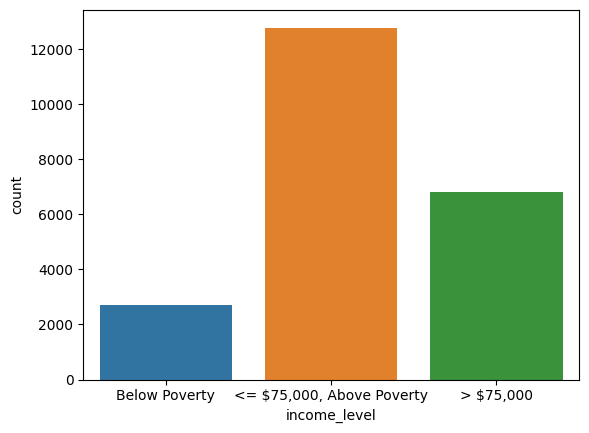

In [86]:
sns.countplot(x="income_level",data=vacc)

<Axes: xlabel='sex', ylabel='count'>

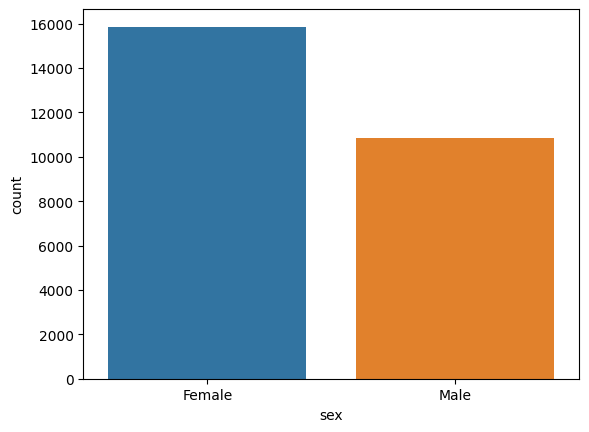

In [87]:
sns.countplot(x="sex",data=vacc)

array([[<Axes: title={'center': 'unique_id'}>,
        <Axes: title={'center': 'h1n1_worry'}>,
        <Axes: title={'center': 'h1n1_awareness'}>,
        <Axes: title={'center': 'antiviral_medication'}>,
        <Axes: title={'center': 'contact_avoidance'}>],
       [<Axes: title={'center': 'bought_face_mask'}>,
        <Axes: title={'center': 'wash_hands_frequently'}>,
        <Axes: title={'center': 'avoid_large_gatherings'}>,
        <Axes: title={'center': 'reduced_outside_home_cont'}>,
        <Axes: title={'center': 'avoid_touch_face'}>],
       [<Axes: title={'center': 'dr_recc_h1n1_vacc'}>,
        <Axes: title={'center': 'dr_recc_seasonal_vacc'}>,
        <Axes: title={'center': 'chronic_medic_condition'}>,
        <Axes: title={'center': 'cont_child_undr_6_mnths'}>,
        <Axes: title={'center': 'is_health_worker'}>],
       [<Axes: title={'center': 'has_health_insur'}>,
        <Axes: title={'center': 'is_h1n1_vacc_effective'}>,
        <Axes: title={'center': 'is_h1n1_ri

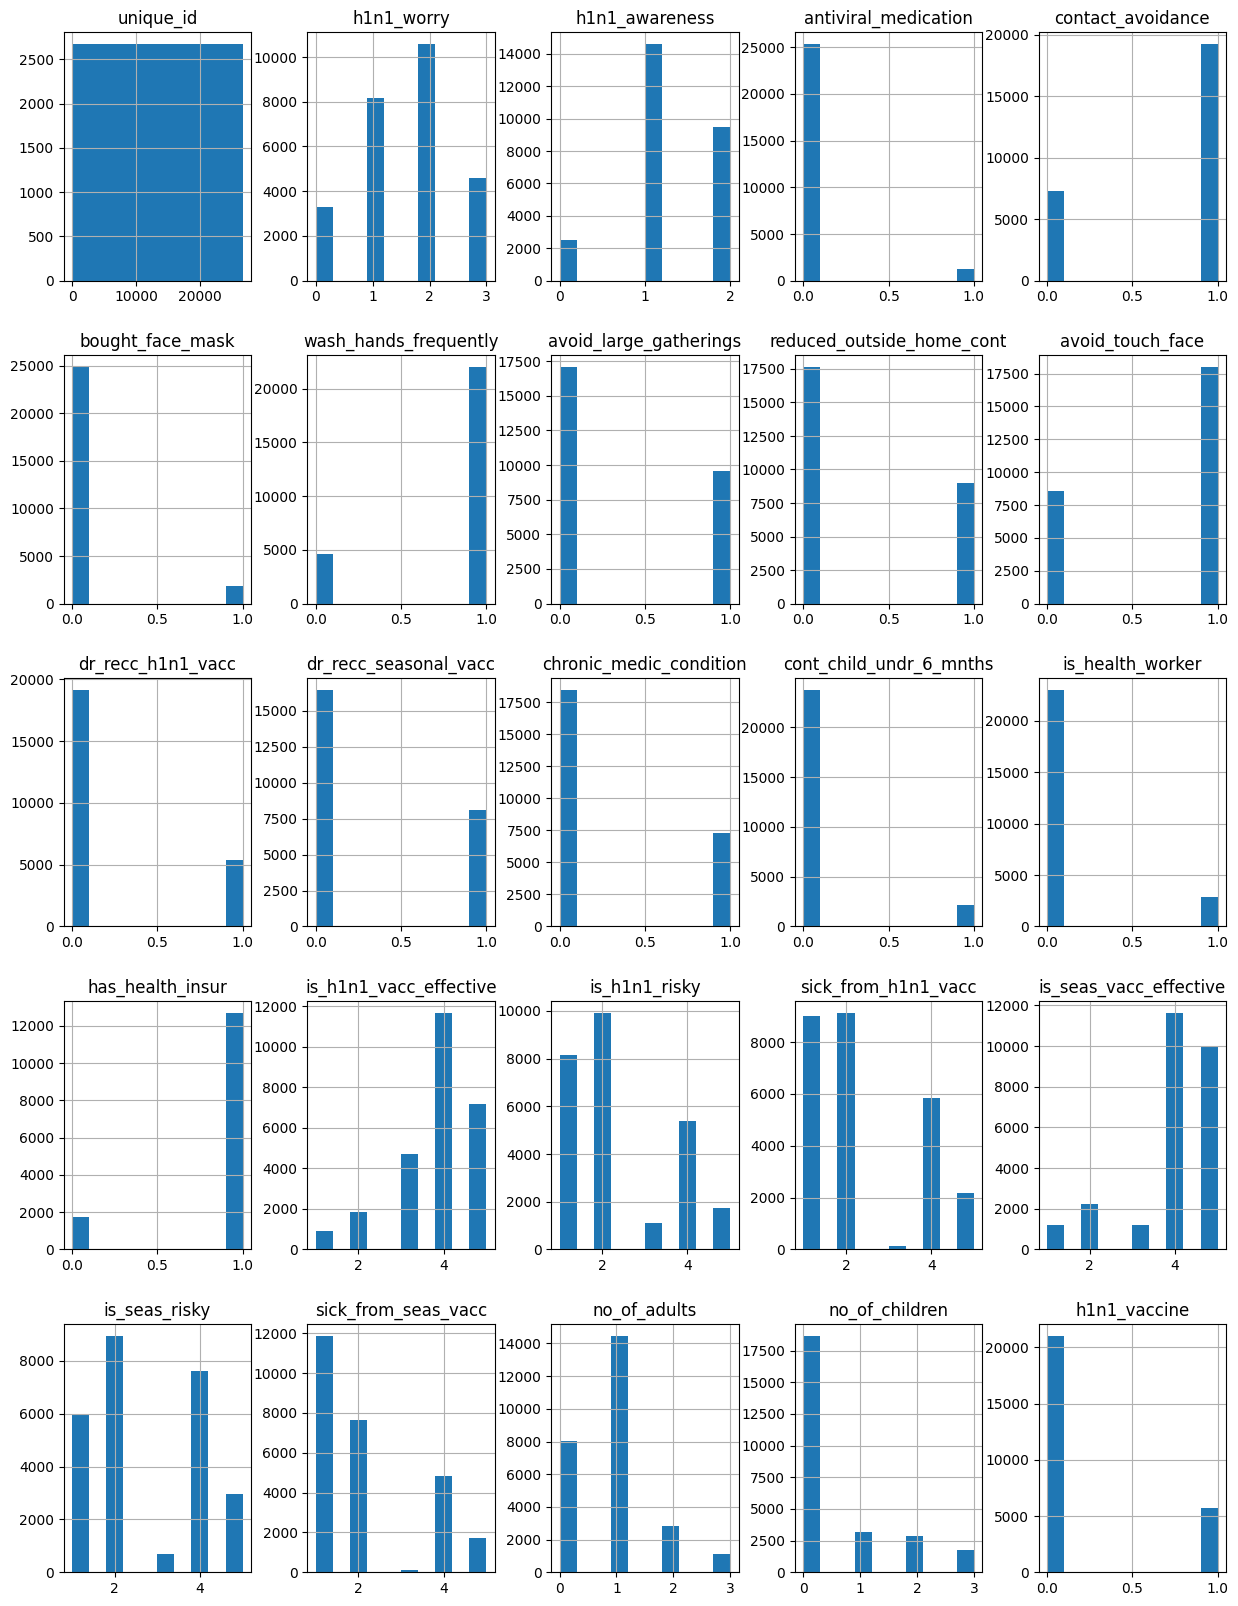

In [88]:
vacc.hist(figsize=(15,20))

In [89]:
corr=vacc.corr()
corr

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
unique_id,1.000000,0.017839,0.003425,-0.008475,0.009638,-0.006644,0.011105,0.004539,0.009011,0.007575,...,-0.012603,0.005912,0.000958,-0.002270,0.005935,-0.005291,0.009563,0.000187,-0.003726,-0.003280
h1n1_worry,0.017839,1.000000,0.062522,0.090301,0.233713,0.156032,0.293565,0.255031,0.246424,0.248016,...,-0.003655,0.239604,0.377033,0.360070,0.235136,0.333990,0.225731,-0.015658,0.050525,0.121929
h1n1_awareness,0.003425,0.062522,1.000000,-0.010836,0.088839,0.030050,0.089785,-0.048898,-0.068219,0.086162,...,0.119408,0.121009,0.073086,-0.019501,0.086103,0.076825,-0.062483,0.024874,0.050583,0.117951
antiviral_medication,-0.008475,0.090301,-0.010836,1.000000,0.049247,0.146261,0.064119,0.106287,0.127679,0.070868,...,-0.063988,0.030211,0.105163,0.079091,0.015003,0.085315,0.084305,0.044900,0.084822,0.040608
contact_avoidance,0.009638,0.233713,0.088839,0.049247,1.000000,0.064946,0.338130,0.227675,0.220348,0.335335,...,0.032662,0.112300,0.117851,0.131405,0.119554,0.129504,0.082942,0.019122,0.040328,0.047690
bought_face_mask,-0.006644,0.156032,0.030050,0.146261,0.064946,1.000000,0.083363,0.180907,0.163382,0.104335,...,-0.040257,0.037651,0.131165,0.107129,0.041556,0.110161,0.090009,0.013991,0.005826,0.070498
wash_hands_frequently,0.011105,0.293565,0.089785,0.064119,0.338130,0.083363,1.000000,0.195364,0.192619,0.365064,...,0.031919,0.136987,0.168711,0.150024,0.138517,0.172464,0.088029,0.009669,0.047764,0.074712
avoid_large_gatherings,0.004539,0.255031,-0.048898,0.106287,0.227675,0.180907,0.195364,1.000000,0.584085,0.253683,...,-0.059000,0.052299,0.126463,0.185924,0.078491,0.132865,0.135446,-0.031938,-0.009449,0.017822
reduced_outside_home_cont,0.009011,0.246424,-0.068219,0.127679,0.220348,0.163382,0.192619,0.584085,1.000000,0.267719,...,-0.061381,0.050748,0.125549,0.174834,0.067469,0.120237,0.138133,-0.027527,-0.009558,0.021768
avoid_touch_face,0.007575,0.248016,0.086162,0.070868,0.335335,0.104335,0.365064,0.253683,0.267719,1.000000,...,0.011024,0.104126,0.146080,0.131772,0.105798,0.143735,0.090097,-0.000553,0.023606,0.071648


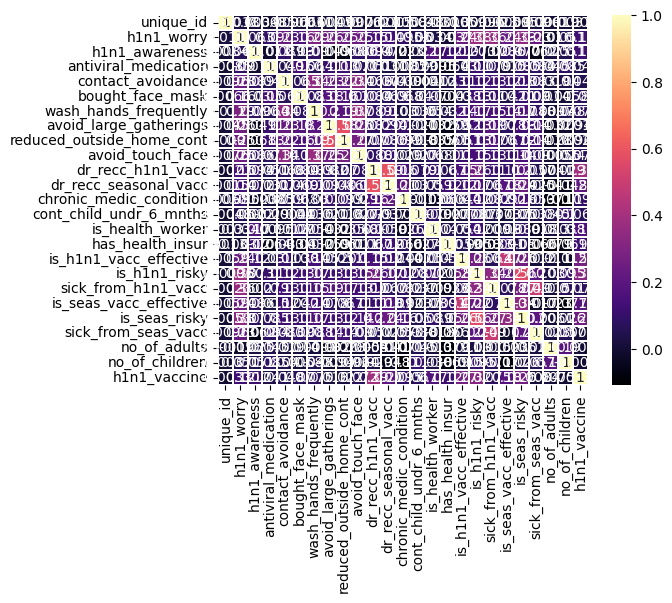

<Figure size 6000x6000 with 0 Axes>

In [90]:
colormap=plt.cm.magma
sns.heatmap(corr,annot=True,cmap=colormap,linewidths=0.1,vmax=1.0,square=True,linecolor="white")
plt.figure(figsize=(60,60))
plt.show()

In [91]:
vacc.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [92]:
vacc.drop("has_health_insur",axis=1,inplace=True)

In [93]:
vacc.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
income_level                 4423
marital_status               1408
housing_status               2042
employment                   1463
census_msa    

In [94]:
median1=vacc["wash_hands_frequently"].median()
vacc["wash_hands_frequently"].replace(np.nan,median1,inplace=True)
median2=vacc["reduced_outside_home_cont"].median()
vacc["reduced_outside_home_cont"].replace(np.nan,median2,inplace=True)
median1,median2

(1.0, 0.0)

In [95]:
mode1=vacc["income_level"].mode().values[0]
vacc["income_level"].replace(np.nan,mode1,inplace=True)
mode2=vacc["employment"].mode().values[0]
vacc["employment"].replace(np.nan,mode2,inplace=True)
mode3=vacc["qualification"].mode().values[0]
vacc["qualification"].replace(np.nan,mode3,inplace=True)
mode4=vacc["marital_status"].mode().values[0]
vacc["marital_status"].replace(np.nan,mode4,inplace=True)
mode5=vacc["housing_status"].mode().values[0]
vacc["housing_status"].replace(np.nan,mode5,inplace=True)
mode1,mode2,mode3,mode4,mode5

('<= $75,000, Above Poverty', 'Employed', 'College Graduate', 'Married', 'Own')

In [96]:
vacc.isnull().sum()

unique_id                       0
h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently           0
avoid_large_gatherings         87
reduced_outside_home_cont       0
avoid_touch_face              128
dr_recc_h1n1_vacc            2160
dr_recc_seasonal_vacc        2160
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                   0
race                            0
sex                             0
income_level                    0
marital_status                  0
housing_status                  0
employment                      0
census_msa    

In [97]:
vacc.dropna(inplace=True)

In [98]:
vacc.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [99]:
vacc.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [100]:
vacc=pd.get_dummies(vacc,columns=["age_bracket","qualification","race","sex","income_level","marital_status","housing_status","employment","census_msa"])

In [101]:
vacc.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,marital_status_Married,marital_status_Not Married,housing_status_Own,housing_status_Rent,employment_Employed,employment_Not in Labor Force,employment_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,1,1,0,0,1,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1,0,1,1,0,0,1,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,1,0,1,0,1,0,0,1,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1,0,1,0,1,0,0,1,0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1,0,1,0,1,0,0,0,1,0


In [102]:
vacc.shape

(23042, 52)

In [103]:
vacc.dtypes

unique_id                                   int64
h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64


In [104]:
vacc["h1n1_vaccine"].sum()

5197

In [105]:
x=vacc.drop("h1n1_vaccine",axis=1) 
y=vacc["h1n1_vaccine"]

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=1)

In [107]:
lr=LogisticRegression()

In [108]:
lr.fit(x_train,y_train)

LogisticRegression()

In [109]:
lr.score(x_train,y_train)

0.7869077757685352

In [110]:
lr.score(x_test,y_test)

0.7899533470760551

In [111]:
plr=lr.predict(x_test)
plr

array([0, 0, 0, ..., 0, 0, 0])

In [112]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,plr)

0.7899533470760551

In [113]:
from sklearn import metrics

<Axes: >

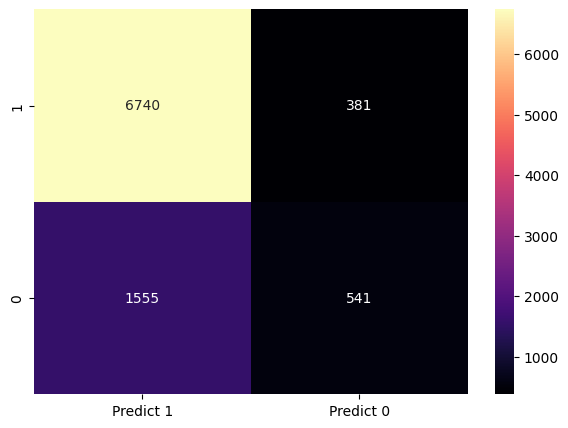

In [114]:
colormap=plt.cm.magma
cm=metrics.confusion_matrix(y_test,plr,labels=[0,1])
vacc_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(vacc_cm,annot=True,fmt="g",cmap=colormap)

In [115]:
print(metrics.classification_report(y_test,plr))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      7121
           1       0.59      0.26      0.36      2096

    accuracy                           0.79      9217
   macro avg       0.70      0.60      0.62      9217
weighted avg       0.76      0.79      0.76      9217



In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt=DecisionTreeClassifier()

In [118]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [119]:
dt.score(x_train,y_train)

1.0

In [120]:
dt.score(x_test,y_test)

0.7403710534881198

In [121]:
from sklearn.model_selection import RandomizedSearchCV

In [122]:
criterion=["gini","entropy"]
max_depth=[1,2,3,4,5,6,7,None]
param_grid={'criterion': criterion,'max_depth': max_depth}
param_grid

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}

In [123]:
dt_grid=RandomizedSearchCV(estimator= dt,param_distributions= param_grid,cv=2,verbose=2,n_jobs=-1)

In [124]:
dt_grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]},
                   verbose=2)

In [125]:
dt_grid.best_params_

{'max_depth': 3, 'criterion': 'entropy'}

In [126]:
dt_grid.score(x_train,y_train)

0.8211934900542496

In [127]:
dt_grid.score(x_test,y_test)

0.8166431593794076

In [128]:
pdt=dt_grid.predict(x_test)
pdt

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
accuracy_score(y_test,pdt)

0.8166431593794076

<Axes: >

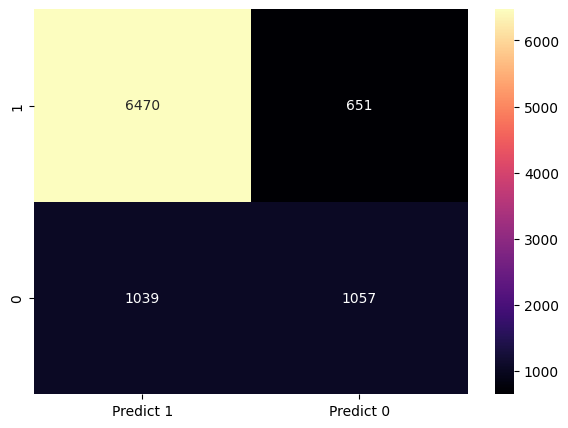

In [130]:
colormap=plt.cm.magma
cm=metrics.confusion_matrix(y_test,pdt,labels=[0,1])
vacc_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(vacc_cm,annot=True,fmt="g",cmap=colormap)

In [131]:
print(metrics.classification_report(y_test,pdt))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      7121
           1       0.62      0.50      0.56      2096

    accuracy                           0.82      9217
   macro avg       0.74      0.71      0.72      9217
weighted avg       0.81      0.82      0.81      9217



In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf=RandomForestClassifier()

In [134]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [135]:
rf.score(x_train,y_train)

1.0

In [136]:
rf.score(x_test,y_test)

0.8261907345123142

In [137]:
param_rf={"n_estimators":[20,60,100,120],"max_depth":[1,2,4,8,None],"max_samples":[0.25,0.75,1.0],"bootstrap":[True,False],"min_samples_split":[2,5],"min_samples_leaf":[1,2]}

In [138]:
rf_grid=RandomizedSearchCV(estimator=rf,param_distributions=param_rf,cv=2,verbose=2,n_jobs=-1)

In [139]:
rf_grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 4, 8, None],
                                        'max_samples': [0.25, 0.75, 1.0],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [20, 60, 100, 120]},
                   verbose=2)

In [140]:
rf_grid.best_params_

{'n_estimators': 120,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_samples': 0.25,
 'max_depth': None,
 'bootstrap': True}

In [141]:
rf_grid.score(x_train,y_train)

0.872622061482821

In [142]:
rf_grid.score(x_test,y_test)

0.826299229684279

In [143]:
prf=rf_grid.predict(x_test)
prf

array([0, 0, 0, ..., 0, 0, 0])

In [144]:
accuracy_score(y_test,prf)

0.826299229684279

<Axes: >

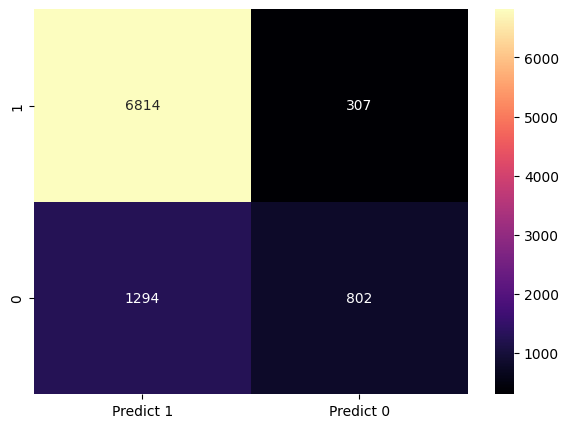

In [145]:
colormap=plt.cm.magma
cm=metrics.confusion_matrix(y_test,prf,labels=[0,1])
vacc_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(vacc_cm,annot=True,fmt="g",cmap=colormap)

In [146]:
print(metrics.classification_report(y_test,prf))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7121
           1       0.72      0.38      0.50      2096

    accuracy                           0.83      9217
   macro avg       0.78      0.67      0.70      9217
weighted avg       0.81      0.83      0.81      9217



In [147]:
from sklearn.ensemble import AdaBoostClassifier

In [148]:
ad=AdaBoostClassifier()

In [149]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [150]:
ad.score(x_train,y_train)

0.8300904159132008

In [151]:
ad.score(x_test,y_test)

0.82922859932733

In [153]:
param_ad=dict()
param_ad["n_estimators"]=[10,50,100,150]
param_ad["learning_rate"]=[0.00001,0.001,0.0001,0.1,1.0]
param_ad["algorithm"]=["SAMME","SAMME.R"]

In [154]:
ad_grid=RandomizedSearchCV(estimator=ad,param_distributions=param_ad,cv=2,verbose=2,n_jobs=-1)

In [158]:
ad_grid.fit(x_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2, estimator=AdaBoostClassifier(), n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [1e-05, 0.001, 0.0001,
                                                          0.1, 1.0],
                                        'n_estimators': [10, 50, 100, 150]},
                   verbose=2)

In [159]:
ad_grid.best_params_

{'n_estimators': 100, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}

In [160]:
ad_grid.score(x_train,y_train)

0.8316094032549729

In [161]:
ad_grid.score(x_test,y_test)

0.8272756862319627

In [181]:
pad_1=ad_grid.predict(x_test)
pad_1

array([0, 0, 0, ..., 0, 0, 0])

In [163]:
pad=ad.predict(x_test)
pad

array([0, 0, 0, ..., 0, 0, 0])

In [164]:
accuracy_score(y_test,pad)

0.82922859932733

In [182]:
accuracy_score(y_test,pad_1)

0.8272756862319627

<Axes: >

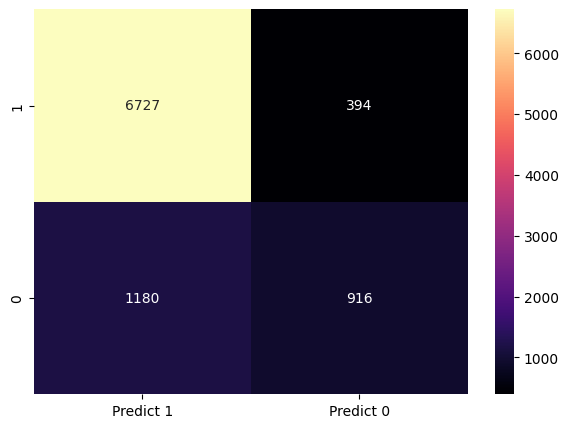

In [165]:
colormap=plt.cm.magma
cm=metrics.confusion_matrix(y_test,pad,labels=[0,1])
vacc_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(vacc_cm,annot=True,fmt="g",cmap=colormap)

In [166]:
print(metrics.classification_report(y_test,pad))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      7121
           1       0.70      0.44      0.54      2096

    accuracy                           0.83      9217
   macro avg       0.78      0.69      0.72      9217
weighted avg       0.82      0.83      0.81      9217



In [167]:
from sklearn.svm import SVC

In [168]:
svc=SVC()

In [169]:
svc.fit(x_train,y_train)

SVC()

In [170]:
svc.score(x_train,y_train)

0.7756962025316456

In [171]:
svc.score(x_test,y_test)

0.7725941195616796

In [176]:
psvc=svc.predict(x_test)
psvc

array([0, 0, 0, ..., 0, 0, 0])

In [177]:
accuracy_score(y_test,psvc)

0.7725941195616796

<Axes: >

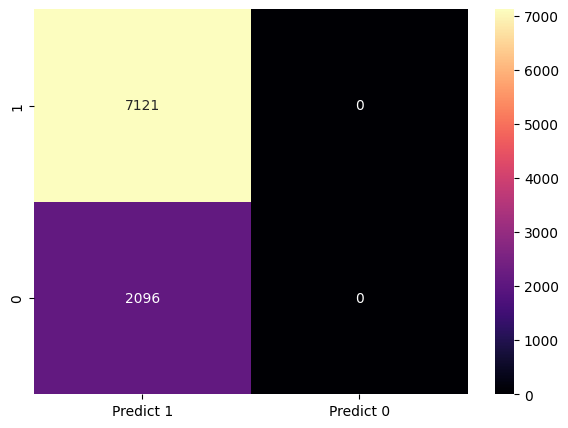

In [178]:
colormap=plt.cm.magma
cm=metrics.confusion_matrix(y_test,psvc,labels=[0,1])
vacc_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(vacc_cm,annot=True,fmt="g",cmap=colormap)

In [179]:
print(metrics.classification_report(y_test,psvc))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      7121
           1       0.00      0.00      0.00      2096

    accuracy                           0.77      9217
   macro avg       0.39      0.50      0.44      9217
weighted avg       0.60      0.77      0.67      9217



In [191]:
unique_id=[]
for i in range(9217):
  unique_id.append(i+1)
print(unique_id)  

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [194]:
id=pd.Series(data=unique_id)
id

0          1
1          2
2          3
3          4
4          5
        ... 
9212    9213
9213    9214
9214    9215
9215    9216
9216    9217
Length: 9217, dtype: int64

In [196]:
sub=id.to_frame()
sub.insert(1,"is_h1n1_vaccinated",pad,True)
sub.to_csv("Prediction of H1N1 Vaccination.csv")